<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Project hypothesis: students in low-income school districts are not meeting/exceeding the benchmark for SAT Math, Evidence-Based Reading & Writing (ERW), and ACT composite scores. This project aims to explore a possible correlation between the districts with the most Free and Reduced-Priced Meal participation and their scores on the ACT and SAT so that Title I program leaders can determine funding or grant eligibility. These grants and funding sources could help improve ACT and SAT scores of children from low-income families to help ensure that all children meet challenging state academic standards.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
    1. [2019 ACT Scores in California by School](#2019-act-scores-in-california-by-school)
    2. [2019 SAT Scores in California by School](#2019-sat-scores-in-california-by-school)
    3. [2018-19 Free and Reduced-Price Meals](#2018-19-free-and-reduced-price-meals)
    4. [Merge Data Frames](#merge-dataframes)
- [Data Dictionary](#data-dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

Title I, Part A of the Elementary and Secondary Education Act provides financial assistance to local educational agencies and schools with high numbers or high percentages of children from low-income families to help ensure that all children meet challenging state academic standards. More information can be found on the [*U.S. Department of Education Title I, Part A*](https://www2.ed.gov/programs/titleiparta/index.html) website.

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online. The two selected datasets from the provided list are below:

* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School


The datasets I will use for this analysis are described below:
 * __2019 ACT Scores in California by School__
   * This dataset includes the ACT scores for students in California by school. The fields have average scores for English, Reading, Math, and Science. There are also a couple of columns for numbers and percentages of of test takers whose ACT composite scores are greater or equal to 21.
 * __2019 SAT Scores in California by School__
   * This dataset includes SAT scores for students in California by school. The fields have the number and percentages for benchmarks being met for Math and Evidence-based Reading and Writing (ERW) of students in grades 11 and 12.

### Outside Research

Additional background related to free or reduced-price meals (FRPM):
* Students who receive free or reduced-price meal benefits are considered those children who are most in need based on parent(s) income and Consumer Price Index. [Income Eligibility Guidelines](https://www.federalregister.gov/documents/2018/05/08/2018-09679/child-nutrition-programs-income-eligibility-guidelines) can be found from the Food and Nutrition Service Agency of the United States of America.
 * __2018-19 Free or Reduced-Price Meal (FRPM) School-level Data__
   * This additional dataset provides information about the free or reduced-price meal (FRPM) data. Students who receive free or reduced-price meal benefits are considered those children who are most in need based on parent(s) income and Consumer Price Index.
   * [`frpm_1819_ca.csv`](./data/frpm_1819_ca.csv): 2018-19 Free or Reduced-Price Meal (FRPM) School-level Data

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Mean is the sum of all the values divided by the number of values. 
# Function to calculate the mean of values:

def manual_mean(values):
    return sum(values) / len(values)

In [2]:
# list of numbers for test:
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Function test and function result to variable for use in STD below:

mean = manual_mean(values)
print(mean)

5.5


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
# Code:
def standard_dev(numbers):
    variance = sum((x - int(mean))**2 for x in numbers) / len(numbers)
    std = (variance)**1/2
    return std

In [4]:
# Function test:
standard_dev(values)

4.25

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
# Data cleaning function:
def percentage_strip(string):
    clean = float(string.strip('%')) / 100
    return clean

In [6]:
#function test
percentage_strip("50%")

0.5

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [7]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics

pd.options.display.max_columns =999  # use to change the max number of columns to display

## Data Import and Cleaning

In [8]:
act2019 = pd.read_csv("./data/act_2019_ca.csv")
sat2019 = pd.read_csv("./data/sat_2019_ca.csv")
frpm1819 = pd.read_csv("./data/frpm_1819_ca.csv")

### 2019 ACT Scores in California by School

In [9]:
# Show the first 5 rows
act2019.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [10]:
# Check for missing values
act2019.isnull().sum()

CDS               1
CCode             1
CDCode            1
SCode           523
RType             1
SName           581
DName            59
CName             1
Enroll12          1
NumTstTakr        1
AvgScrRead      357
AvgScrEng       357
AvgScrMath      357
AvgScrSci       357
NumGE21         357
PctGE21         357
Year              1
Unnamed: 17    2310
dtype: int64

In [11]:
act2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1953 non-null   object 
 11  AvgScrEng    1953 non-null   object 
 12  AvgScrMath   1953 non-null   object 
 13  AvgScrSci    1953 non-null   object 
 14  NumGE21      1953 non-null   object 
 15  PctGE21      1953 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

In [12]:
act2019 = act2019.drop(columns=['Year', 'AvgScrRead', 'AvgScrEng', 'AvgScrMath', 'AvgScrSci'])

In [13]:
act2019 = act2019.rename(dict(CCode='county_code', 
CDCode='district_code', 
SCode='school_code', 
RType='record_type', 
SName='school_name', 
DName='district_name', 
CName='county_name', 
Enroll12='act_12_enrolled', 
NumTstTakr='act_num_test_takers', 
AvgScrRead='act_avg_read', 
AvgScrEng='act_avg_eng', 
AvgScrMath='act_avg_math', 
AvgScrSci='act_avg_sci', 
NumGE21='act_num_comp_ge21', 
PctGE21='act_pct_ge21'), 
axis='columns')

In [14]:
act2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CDS                  2309 non-null   float64
 1   county_code          2309 non-null   float64
 2   district_code        2309 non-null   float64
 3   school_code          1787 non-null   float64
 4   record_type          2309 non-null   object 
 5   school_name          1729 non-null   object 
 6   district_name        2251 non-null   object 
 7   county_name          2309 non-null   object 
 8   act_12_enrolled      2309 non-null   float64
 9   act_num_test_takers  2309 non-null   float64
 10  act_num_comp_ge21    1953 non-null   object 
 11  act_pct_ge21         1953 non-null   object 
 12  Unnamed: 17          0 non-null      float64
dtypes: float64(7), object(6)
memory usage: 234.7+ KB


In [15]:
# Replace NaN with 0. Using zero is the logical replacement since school that have no students taking the assessment should count as zero scores in project stats.
act2019 = act2019.fillna(0)

In [16]:
act2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CDS                  2310 non-null   float64
 1   county_code          2310 non-null   float64
 2   district_code        2310 non-null   float64
 3   school_code          2310 non-null   float64
 4   record_type          2310 non-null   object 
 5   school_name          2310 non-null   object 
 6   district_name        2310 non-null   object 
 7   county_name          2310 non-null   object 
 8   act_12_enrolled      2310 non-null   float64
 9   act_num_test_takers  2310 non-null   float64
 10  act_num_comp_ge21    2310 non-null   object 
 11  act_pct_ge21         2310 non-null   object 
 12  Unnamed: 17          2310 non-null   float64
dtypes: float64(7), object(6)
memory usage: 234.7+ KB


### 2019 SAT Scores in California by School

In [17]:
# Show the first 5 rows
sat2019.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,NaN,NaN,NaN,NaN,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,*,*,*,*,26.0,6.0,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,219.0,174.0,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,333.0,275.0,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,*,*,*,*,17.0,5.0,*,*,*,*,*,*,*,*,2018-19,NaN


In [18]:
# Check for missing values
sat2019.isnull().sum()

CDS                         1
CCode                       1
CDCode                      1
SCode                       1
RType                       1
SName                     598
DName                      59
CName                       1
Enroll12                    1
NumTSTTakr12                1
NumERWBenchmark12         276
PctERWBenchmark12         276
NumMathBenchmark12        276
PctMathBenchmark12        276
Enroll11                    1
NumTSTTakr11                1
NumERWBenchmark11         311
PctERWBenchmark11         311
NumMathBenchmark11        311
PctMathBenchmark11        311
TotNumBothBenchmark12     276
PctBothBenchmark12        276
TotNumBothBenchmark11     311
PctBothBenchmark11        311
Year                        1
Unnamed: 25              2580
dtype: int64

In [19]:
sat2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

In [20]:
#Removing all of the columns with data about 11th grades so that I can compare only the 12th graders. The data for the ACT only included 12th grader results.
sat2019 = sat2019.drop(columns=['NumTSTTakr11', 
'NumERWBenchmark11', 
'PctERWBenchmark11', 
'NumMathBenchmark11', 
'PctMathBenchmark11', 
'TotNumBothBenchmark11', 
'PctBothBenchmark11',
'NumMathBenchmark12', 
'PctMathBenchmark12', 
'NumERWBenchmark12',	
'PctERWBenchmark12',
'Enroll11', 
'Year'])   # Remove column Year because it is duplicative of the data information - all data is from the same school year.

In [21]:
sat2019 = sat2019.rename(dict(Enroll12='sat_12_enrolled',
NumTSTTakr12='sat_num_test_takers', 
TotNumBothBenchmark12='sat_tot_num_benchmark', 
PctBothBenchmark12='sat_pct_benchmark',
CCode='county_code', 
CDCode='district_code', 
SCode='school_code', 
RType='record_type', 
SName='school_name', 
DName='district_name', 
CName='county_name'), axis='columns')

sat2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   county_code            2579 non-null   float64
 2   district_code          2579 non-null   float64
 3   school_code            2579 non-null   float64
 4   record_type            2579 non-null   object 
 5   school_name            1982 non-null   object 
 6   district_name          2521 non-null   object 
 7   county_name            2579 non-null   object 
 8   sat_12_enrolled        2579 non-null   float64
 9   sat_num_test_takers    2579 non-null   float64
 10  sat_tot_num_benchmark  2304 non-null   object 
 11  sat_pct_benchmark      2304 non-null   object 
 12  Unnamed: 25            0 non-null      float64
dtypes: float64(7), object(6)
memory usage: 262.2+ KB


In [22]:
# replace NaN with 0
sat2019 = sat2019.fillna(0)

In [23]:
sat2019

,CDS,county_code,district_code,school_code,record_type,school_name,district_name,county_name,sat_12_enrolled,sat_num_test_takers,sat_tot_num_benchmark,sat_pct_benchmark,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,0,0,0.0
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,*,*,0.0
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,14,13.73,0.0
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,18,15.93,0.0
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,*,*,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5.772678e+13,57.0,5772678.0,0.0,D,0,Davis Joint Unified,Yolo,717.0,307.0,268,87.30,0.0
2576,7.000000e+12,7.0,700000.0,0.0,C,0,0,Contra Costa,14593.0,5412.0,2721,50.28,0.0
2577,1.700000e+13,17.0,1700000.0,0.0,C,0,0,Lake,667.0,167.0,65,38.92,0.0
2578,3.800000e+13,38.0,3800000.0,0.0,C,0,0,San Francisco,4447.0,2256.0,1248,55.32,0.0


### 2018-19 Free and Reduced-Price Meals

In [24]:
# Show the first 5 rows
frpm1819.head()

,Academic Year,county_code,district_code,school_code,county_name,district_name,school_name,district_type,school_type,Educational \nOption Type,NSLP \nProvision \nStatus,charter_y_n,Charter \nSchool \nNumber,Charter \nFunding \nType,IRC,Low Grade,High Grade,enrollment_k12,free_meal_count_k12,percent_eligible_free_k12,frpm_count_k12,frpm_percent_eligible_k12,Enrollment \n(Ages 5-17),Free Meal \nCount \n(Ages 5-17),Percent (%) \nEligible Free \n(Ages 5-17),FRPM Count \n(Ages 5-17),Percent (%) \nEligible FRPM \n(Ages 5-17),CALPADS Fall 1 \nCertification Status
0,2018-2019,1,61119,106401,Alameda,Alameda Unified,Alameda Science and Technology Institute,Unified School District,Alternative Schools of Choice,Alternative School of Choice,NaN,No,NaN,NaN,N,9,12,192,47,24.50%,55,28.60%,191,46,24.10%,54,28.30%,Y
1,2018-2019,1,61119,126656,Alameda,Alameda Unified,Maya Lin,Unified School District,Alternative Schools of Choice,Alternative School of Choice,NaN,No,NaN,NaN,N,K,5,427,89,20.80%,98,23.00%,427,89,20.80%,98,23.00%,Y
2,2018-2019,1,61176,130435,Alameda,Fremont Unified,Vista Alternative,Unified School District,Alternative Schools of Choice,Alternative School of Choice,NaN,No,NaN,NaN,N,7,12,34,17,50.00%,19,55.90%,30,15,50.00%,17,56.70%,Y
3,2018-2019,1,61200,130393,Alameda,Livermore Valley Joint Unified,Vineyard Alternative,Unified School District,Alternative Schools of Choice,Alternative School of Choice,NaN,No,NaN,NaN,N,1,12,136,41,30.10%,41,30.10%,128,38,29.70%,38,29.70%,Y
4,2018-2019,1,61234,130484,Alameda,Newark Unified,Crossroads High (Alternative),Unified School District,Alternative Schools of Choice,Alternative School of Choice,NaN,No,NaN,NaN,N,K,12,43,26,60.50%,26,60.50%,39,23,59.00%,23,59.00%,Y


In [25]:
# Check for missing values
frpm1819.isnull().sum()

Academic Year                                   0
county_code                                     0
district_code                                   0
school_code                                     0
county_name                                     0
district_name                                   0
school_name                                     0
district_type                                   0
school_type                                     0
Educational \nOption Type                       0
NSLP \nProvision \nStatus                    1913
charter_y_n                                     0
Charter \nSchool \nNumber                    2168
Charter \nFunding \nType                     2168
IRC                                             0
Low Grade                                       0
High Grade                                      0
enrollment_k12                                  0
free_meal_count_k12                             0
percent_eligible_free_k12                       0


In [26]:
frpm1819.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Academic Year                            2469 non-null   object
 1   county_code                              2469 non-null   int64 
 2   district_code                            2469 non-null   int64 
 3   school_code                              2469 non-null   int64 
 4   county_name                              2469 non-null   object
 5   district_name                            2469 non-null   object
 6   school_name                              2469 non-null   object
 7   district_type                            2469 non-null   object
 8   school_type                              2469 non-null   object
 9   Educational 
Option Type                 2469 non-null   object
 10  NSLP 
Provision 
Status                  556 non-null    obj

In [27]:
# Remove extra columns of data that are not needed for this project
frpm1819 = frpm1819.drop(columns=['Academic Year', 
'CALPADS Fall 1 \nCertification Status', 
'Percent (%) \nEligible FRPM \n(Ages 5-17)', 
'FRPM Count \n(Ages 5-17)', 
'Percent (%) \nEligible Free \n(Ages 5-17)', 
'Free Meal \nCount \n(Ages 5-17)', 
'Enrollment \n(Ages 5-17)',
'IRC',
'Low Grade',
'High Grade', 
'NSLP \nProvision \nStatus', 
'Educational \nOption Type', 
'Charter \nSchool \nNumber',
'Charter \nFunding \nType']
)

In [78]:
#   In pandas, make a boolean mask to filter out rows where a column has a certain value (or values)
frpm1819 = frpm1819[(frpm1819['school_type']!='Elementary Schools (Public)') & (frpm1819['school_type']!='Elemen Schools In 1 School Dist. (Public)') & (frpm1819['school_type']!='Intermediate/Middle Schools (Public)') & (frpm1819['school_type']!='Junior High Schools (Public)') & (frpm1819['school_type']!='Preschool')]
frpm1819

,county_code,district_code,school_code,county_name,district_name,school_name,district_type,school_type,charter_y_n,enrollment_k12,free_meal_count_k12,percent_eligible_free_k12,frpm_count_k12,frpm_percent_eligible_k12
0,1,61119,106401,Alameda,Alameda Unified,Alameda Science and Technology Institute,Unified School District,Alternative Schools of Choice,No,192,47,24.50%,55,28.60%
1,1,61119,126656,Alameda,Alameda Unified,Maya Lin,Unified School District,Alternative Schools of Choice,No,427,89,20.80%,98,23.00%
2,1,61176,130435,Alameda,Fremont Unified,Vista Alternative,Unified School District,Alternative Schools of Choice,No,34,17,50.00%,19,55.90%
3,1,61200,130393,Alameda,Livermore Valley Joint Unified,Vineyard Alternative,Unified School District,Alternative Schools of Choice,No,136,41,30.10%,41,30.10%
4,1,61234,130484,Alameda,Newark Unified,Crossroads High (Alternative),Unified School District,Alternative Schools of Choice,No,43,26,60.50%,26,60.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,33,31625,3330834,Riverside,California School for the Deaf-Riverside (Stat...,California School for the Deaf-Riverside,State Special Schools,State Special Schools,No,348,114,32.80%,114,32.80%
2465,34,32276,330027,Sacramento,California Education Authority (CEA) Headquarters,Pine Grove Youth Conservation Camp,Non-School Locations,Youth Authority Facilities,No,20,19,95.00%,19,95.00%
2466,34,32276,3931250,Sacramento,California Education Authority (CEA) Headquarters,Johanna Boss High,Non-School Locations,Youth Authority Facilities,No,50,49,98.00%,49,98.00%
2467,34,32276,3990025,Sacramento,California Education Authority (CEA) Headquarters,N.A. Chaderjian High,Non-School Locations,Youth Authority Facilities,No,145,144,99.30%,144,99.30%


In [29]:
frpm1819.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 0 to 2468
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   county_code                2469 non-null   int64 
 1   district_code              2469 non-null   int64 
 2   school_code                2469 non-null   int64 
 3   county_name                2469 non-null   object
 4   district_name              2469 non-null   object
 5   school_name                2469 non-null   object
 6   district_type              2469 non-null   object
 7   school_type                2469 non-null   object
 8   charter_y_n                2469 non-null   object
 9   enrollment_k12             2469 non-null   object
 10  free_meal_count_k12        2469 non-null   object
 11  percent_eligible_free_k12  2469 non-null   object
 12  frpm_count_k12             2469 non-null   object
 13  frpm_percent_eligible_k12  2469 non-null   object
dtypes: int64

### Merge DataFrames

In [30]:
act_col = act2019[['school_code', 'act_12_enrolled', 'act_num_test_takers', 'act_num_comp_ge21', 'act_pct_ge21']]

In [31]:
sat_col = sat2019[['school_code', 'sat_12_enrolled', 'sat_num_test_takers', 'sat_tot_num_benchmark', 'sat_pct_benchmark']]

In [32]:
frpm_col = frpm1819[['school_code', 'charter_y_n', 'school_name', 'district_name', 'school_type', 'enrollment_k12', 'free_meal_count_k12', 'percent_eligible_free_k12', 'frpm_count_k12', 'frpm_percent_eligible_k12']]

In [33]:
# create a variable of each, then merge variables
frpm_act = frpm_col.merge(act_col, how='left', on='school_code')

In [34]:
frpm_act_sat = frpm_act.merge(sat_col, how='left', on='school_code')

In [35]:
frpm_act_sat['free_meal_count_k12'] = frpm_act_sat['free_meal_count_k12'].str.replace(',', '')

In [36]:
frpm_act_sat['free_meal_count_k12'] = pd.to_numeric(frpm_act_sat.loc[:,'free_meal_count_k12'])

In [37]:
frpm_act_sat['frpm_count_k12'] = frpm_act_sat['frpm_count_k12'].str.replace(',', '')

In [38]:
frpm_act_sat['frpm_count_k12'] = pd.to_numeric(frpm_act_sat.loc[:,'frpm_count_k12'])

In [39]:
frpm_act_sat['act_num_comp_ge21'] = frpm_act_sat['act_num_comp_ge21'].str.replace('*', '0')

C:\Users\hatch\AppData\Local\Temp/ipykernel_4168/1098620080.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  frpm_act_sat['act_num_comp_ge21'] = frpm_act_sat['act_num_comp_ge21'].str.replace('*', '0')


In [40]:
frpm_act_sat['act_num_comp_ge21'] = pd.to_numeric(frpm_act_sat.loc[:,'act_num_comp_ge21'])

In [41]:
frpm_act_sat['act_pct_ge21'] = frpm_act_sat['act_pct_ge21'].str.replace('*', '0')

C:\Users\hatch\AppData\Local\Temp/ipykernel_4168/1975059583.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  frpm_act_sat['act_pct_ge21'] = frpm_act_sat['act_pct_ge21'].str.replace('*', '0')


In [42]:
frpm_act_sat['act_pct_ge21'] = pd.to_numeric(frpm_act_sat.loc[:,'act_pct_ge21'])

In [43]:
frpm_act_sat['sat_tot_num_benchmark'] = frpm_act_sat['sat_tot_num_benchmark'].str.replace('*', '0')

C:\Users\hatch\AppData\Local\Temp/ipykernel_4168/2580493046.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  frpm_act_sat['sat_tot_num_benchmark'] = frpm_act_sat['sat_tot_num_benchmark'].str.replace('*', '0')


In [44]:
frpm_act_sat['sat_tot_num_benchmark'] = pd.to_numeric(frpm_act_sat.loc[:,'sat_tot_num_benchmark'])

In [45]:
frpm_act_sat['sat_pct_benchmark'] = frpm_act_sat['sat_pct_benchmark'].str.replace("*", "0")

C:\Users\hatch\AppData\Local\Temp/ipykernel_4168/333119922.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  frpm_act_sat['sat_pct_benchmark'] = frpm_act_sat['sat_pct_benchmark'].str.replace("*", "0")


In [46]:
frpm_act_sat['sat_pct_benchmark'] = pd.to_numeric(frpm_act_sat.loc[:,'sat_pct_benchmark'])

In [47]:
frpm_act_sat['enrollment_k12'] = frpm_act_sat['enrollment_k12'].str.replace(',', '')

In [48]:
frpm_act_sat['enrollment_k12'] = pd.to_numeric(frpm_act_sat.loc[:,'enrollment_k12'])

In [49]:
def percent_strip(string):
    clean = float(string.strip('%')) / 100
    return clean

# https://stackoverflow.com/questions/40353519/how-to-apply-custom-function-to-pandas-data-frame-for-each-row

In [50]:
frpm_act_sat['percent_eligible_free_k12'] = frpm_act_sat['percent_eligible_free_k12'].apply(percent_strip)

In [51]:
frpm_act_sat['frpm_percent_eligible_k12'] = frpm_act_sat['frpm_percent_eligible_k12'].apply(percent_strip)

In [52]:
frpm_act_sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 0 to 2468
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   school_code                2469 non-null   int64  
 1   charter_y_n                2469 non-null   object 
 2   school_name                2469 non-null   object 
 3   district_name              2469 non-null   object 
 4   school_type                2469 non-null   object 
 5   enrollment_k12             2469 non-null   int64  
 6   free_meal_count_k12        2469 non-null   int64  
 7   percent_eligible_free_k12  2469 non-null   float64
 8   frpm_count_k12             2469 non-null   int64  
 9   frpm_percent_eligible_k12  2469 non-null   float64
 10  act_12_enrolled            1459 non-null   float64
 11  act_num_test_takers        1459 non-null   float64
 12  act_num_comp_ge21          1269 non-null   float64
 13  act_pct_ge21               1269 non-null   float

In [53]:
frpm_act_sat = frpm_act_sat.fillna(0)
frpm_act_sat.head()

,school_code,charter_y_n,school_name,district_name,school_type,enrollment_k12,free_meal_count_k12,percent_eligible_free_k12,frpm_count_k12,frpm_percent_eligible_k12,act_12_enrolled,act_num_test_takers,act_num_comp_ge21,act_pct_ge21,sat_12_enrolled,sat_num_test_takers,sat_tot_num_benchmark,sat_pct_benchmark
0,106401,No,Alameda Science and Technology Institute,Alameda Unified,Alternative Schools of Choice,192,47,0.245,55,0.286,43.0,12.0,0.0,0.0,43.0,32.0,28.0,87.5
1,126656,No,Maya Lin,Alameda Unified,Alternative Schools of Choice,427,89,0.208,98,0.230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,130435,No,Vista Alternative,Fremont Unified,Alternative Schools of Choice,34,17,0.500,19,0.559,20.0,0.0,0.0,0.0,20.0,1.0,0.0,0.0
3,130393,No,Vineyard Alternative,Livermore Valley Joint Unified,Alternative Schools of Choice,136,41,0.301,41,0.301,49.0,3.0,0.0,0.0,49.0,5.0,0.0,0.0
4,130484,No,Crossroads High (Alternative),Newark Unified,Alternative Schools of Choice,43,26,0.605,26,0.605,17.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0


In [54]:
frpm_act_sat

,school_code,charter_y_n,school_name,district_name,school_type,enrollment_k12,free_meal_count_k12,percent_eligible_free_k12,frpm_count_k12,frpm_percent_eligible_k12,act_12_enrolled,act_num_test_takers,act_num_comp_ge21,act_pct_ge21,sat_12_enrolled,sat_num_test_takers,sat_tot_num_benchmark,sat_pct_benchmark
0,106401,No,Alameda Science and Technology Institute,Alameda Unified,Alternative Schools of Choice,192,47,0.245,55,0.286,43.0,12.0,0.0,0.00,43.0,32.0,28.0,87.5
1,126656,No,Maya Lin,Alameda Unified,Alternative Schools of Choice,427,89,0.208,98,0.230,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,130435,No,Vista Alternative,Fremont Unified,Alternative Schools of Choice,34,17,0.500,19,0.559,20.0,0.0,0.0,0.00,20.0,1.0,0.0,0.0
3,130393,No,Vineyard Alternative,Livermore Valley Joint Unified,Alternative Schools of Choice,136,41,0.301,41,0.301,49.0,3.0,0.0,0.00,49.0,5.0,0.0,0.0
4,130484,No,Crossroads High (Alternative),Newark Unified,Alternative Schools of Choice,43,26,0.605,26,0.605,17.0,0.0,0.0,0.00,17.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,3330834,No,California School for the Deaf-Riverside,California School for the Deaf-Riverside (Stat...,State Special Schools,348,114,0.328,114,0.328,76.0,26.0,2.0,7.69,0.0,0.0,0.0,0.0
2465,330027,No,Pine Grove Youth Conservation Camp,California Education Authority (CEA) Headquarters,Youth Authority Facilities,20,19,0.950,19,0.950,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2466,3931250,No,Johanna Boss High,California Education Authority (CEA) Headquarters,Youth Authority Facilities,50,49,0.980,49,0.980,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2467,3990025,No,N.A. Chaderjian High,California Education Authority (CEA) Headquarters,Youth Authority Facilities,145,144,0.993,144,0.993,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [55]:
frpm_act_sat.to_csv('./data/frpm_act_sat.csv')

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**school_code**|*integer*|FRPM & ACT/SAT|The school code is a state number to identify schools. It is how all of the data frames connect.|
|**charter_y_n**|*object*|FRPM|Yes or No; this school is a Charter School|
|**school_name**|*object*|FRPM & ACT/SAT|School Name|
|**district_name**|*object*|FRPM & ACT/SAT|District Name|
|**school_type**|*object*|FRPM|Type of school: Elementary, Middle, Junior High, High, Alternative, County Community, K-12 Schools, Preschool, Special Education Schools, Youth Authority Facilities, etc..| 
|**enrollment_k12**|*integer*|FRPM|Enrollment of K-12 students at the school.| 
|**free_meal_count_k12**|*integer*|FRPM|Count of students who get free meals in K-12 of the total count of students enrolled.|
|**percent_eligible_free_k12**|*float*|FRPM|Percent of students eligible for free meals.|
|**frpm_count_k12**|*integer*|FRPM|Total count of students who meet household income or categorical eligibility criteria for free or reduced price meals.|
|**frpm_percent_eligible_k12**|*float*|FRPM|Percent of students eligible for FRPM.|
|**act_12_enrolled**|*float*|ACT|Enrollment of student in Grade 12, ACT.|
|**act_num_test_takers**|*float*|ACT|Number of ACT test takers.|
|**act_num_comp_ge21**|*float*|ACT|Number of test takers whose ACT Composite Cores are greater than or equal to 21.|
|**act_pct_ge21**|*float*|ACT|Percentage of test takers whose ACT Composite Cores are greater than or equal to 21.|
|**sat_12_enrolled**|*float*|SAT|Enrollment of students in Grade 12, SAT.|
|**sat_num_test_takers**|*float*|SAT|Number of SAT test takers in Grade 12.|
|**sat_tot_num_benchmark**|*float*|SAT|Total number of students who met the benchmark of ERW and Math in Grade 12.|
|**sat_pct_benchmark**|*float*|SAT|Percentage of students who met the benchmark of ERW and Math in Grade 12.|


## Exploratory Data Analysis



Project hypothesis: students in low-income school districts are not meeting/exceeding the benchmark for SAT Math, Evidence-Based Reading & Writing (ERW), and ACT composite scores. This project aims to explore a possible correlation between the districts with the most Free and Reduced-Priced Meal participation and their aggregate scores on the ACT and SAT so that Title I program leaders can determine funding or grant eligibility. These grants and funding sources could help improve ACT and SAT scores of children from low-income families to help ensure that all children meet challenging state academic standards.

Which districts have most FRPM participation? 
What are the district's SAT/ACT scores? Did they meet benchmarks?

In [57]:
# 1. Summary Statistics
frpm_act_sat.describe()

,school_code,enrollment_k12,free_meal_count_k12,percent_eligible_free_k12,frpm_count_k12,frpm_percent_eligible_k12,act_12_enrolled,act_num_test_takers,act_num_comp_ge21,act_pct_ge21,sat_12_enrolled,sat_num_test_takers,sat_tot_num_benchmark,sat_pct_benchmark
count,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,2.301456e+06,767.457270,377.608343,0.589899,433.707979,0.650702,170.443094,32.057513,17.602268,20.218817,177.319968,66.593763,30.234913,20.037108
std,1.959365e+06,908.119281,485.834858,0.250793,559.149470,0.254605,221.200525,57.319358,38.717640,30.192289,218.436303,101.275103,53.560065,26.871927
min,1.000570e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.325550e+05,70.000000,39.000000,0.400000,43.000000,0.473000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.937085e+06,293.000000,155.000000,0.619000,172.000000,0.700000,53.000000,1.000000,0.000000,0.000000,74.000000,7.000000,0.000000,0.000000
75%,3.732047e+06,1411.000000,527.000000,0.791000,618.000000,0.859000,328.000000,44.000000,18.000000,39.470000,331.000000,110.000000,39.000000,37.760000
max,9.010745e+06,4698.000000,3863.000000,1.000000,4407.000000,1.000000,1135.000000,512.000000,392.000000,100.000000,1135.000000,932.000000,385.000000,100.000000


In [58]:
#2. Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.

def sd(frpm_act_sat):
    return {col.name:standard_dev(col) for col in [frpm_act_sat[i] for i in frpm_act_sat.columns if (frpm_act_sat[i].dtype == "float64") or (frpm_act_sat[i].dtype == 'int64')]}

sd(frpm_act_sat)

# source: https://stackoverflow.com/questions/55048445/dictionary-comprehension-to-apply-a-function-to-dataframe-columns

{'school_code': 4567118002564.442,
 'enrollment_k12': 702843.8515593357,
 'free_meal_count_k12': 187388.44349939248,
 'percent_eligible_free_k12': 9.755930625556907,
 'frpm_count_k12': 248156.01579586876,
 'frpm_percent_eligible_k12': 9.490593969623356,
 'act_12_enrolled': 38140.63608748481,
 'act_num_test_takers': 2008.1435803969218,
 'act_num_comp_ge21': 828.6328473066019,
 'act_pct_ge21': 571.4087594572702,
 'sat_12_enrolled': 38694.632239773186,
 'sat_num_test_takers': 7023.141960307817,
 'sat_tot_num_benchmark': 1752.1597812879709,
 'sat_pct_benchmark': 473.96131705143847}

In [59]:
frpm_act_sat.groupby(['frpm_percent_eligible_k12']).mean()

,school_code,enrollment_k12,free_meal_count_k12,percent_eligible_free_k12,frpm_count_k12,act_12_enrolled,act_num_test_takers,act_num_comp_ge21,act_pct_ge21,sat_12_enrolled,sat_num_test_takers,sat_tot_num_benchmark,sat_pct_benchmark
frpm_percent_eligible_k12,,,,,,,,,,,,,
0.000,1.411703e+06,2.142857,0.000,0.000000,0.0000,0.428571,0.142857,0.0000,0.000000,0.0000,0.00000,0.00000,0.000000
0.013,1.365150e+05,855.000000,11.000,0.013000,11.0000,205.000000,111.000000,108.0000,97.300000,205.0000,64.00000,57.00000,89.060000
0.018,1.181330e+05,109.000000,2.000,0.018000,2.0000,0.000000,0.000000,0.0000,0.000000,0.0000,0.00000,0.00000,0.000000
0.019,4.337762e+06,1371.000000,26.000,0.019000,26.0000,321.000000,121.000000,117.0000,96.690000,321.0000,88.00000,83.00000,94.320000
0.023,1.017740e+05,348.000000,8.000,0.023000,8.0000,0.000000,0.000000,0.0000,0.000000,0.0000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.987,1.949863e+06,209.250000,198.000,0.970250,206.5000,34.500000,40.500000,6.0000,3.702500,43.0000,36.00000,7.75000,5.615000
0.992,1.931450e+06,120.000000,116.000,0.967000,119.0000,0.000000,0.000000,0.0000,0.000000,31.0000,14.00000,0.00000,0.000000
0.993,2.057508e+06,215.000000,213.500,0.993000,213.5000,142.500000,0.000000,0.0000,0.000000,142.5000,0.00000,0.00000,0.000000


In [60]:
frpm_act_sat['frpm_count_k12'].sort_values(ascending=False)

1408    4407
1471    3018
1769    2785
1230    2753
1058    2745
        ... 
796        0
240        0
345        0
45         0
99         0
Name: frpm_count_k12, Length: 2469, dtype: int64

In [61]:
frpm_act_sat['frpm_percent_eligible_k12'].max()

1.0

In [87]:
frpm_act_sat['frpm_percent_eligible_k12'].min()

0.0

In [62]:
np.quantile(frpm_act_sat['frpm_percent_eligible_k12'], [.25, .50, .75])

array([0.473, 0.7  , 0.859])

In [63]:
frpm_act_sat['frpm_percent_eligible_k12'].value_counts(ascending=False)

1.000    160
0.500     21
0.800     20
0.750     18
0.833     16
        ... 
0.996      1
0.811      1
0.322      1
0.498      1
0.980      1
Name: frpm_percent_eligible_k12, Length: 795, dtype: int64

In [64]:
correlations = frpm_act_sat.corr()
print(correlations['frpm_percent_eligible_k12'])

# source: https://towardsdatascience.com/correlation-is-simple-with-seaborn-and-pandas-28c28e92701e

school_code                 -0.113620
enrollment_k12              -0.284142
free_meal_count_k12          0.115829
percent_eligible_free_k12    0.975954
frpm_count_k12               0.098518
frpm_percent_eligible_k12    1.000000
act_12_enrolled             -0.292070
act_num_test_takers         -0.317185
act_num_comp_ge21           -0.499619
act_pct_ge21                -0.504866
sat_12_enrolled             -0.280328
sat_num_test_takers         -0.236274
sat_tot_num_benchmark       -0.460157
sat_pct_benchmark           -0.530874
Name: frpm_percent_eligible_k12, dtype: float64


In [65]:
print(correlations['percent_eligible_free_k12'])

school_code                 -0.115871
enrollment_k12              -0.329968
free_meal_count_k12          0.055174
percent_eligible_free_k12    1.000000
frpm_count_k12               0.029821
frpm_percent_eligible_k12    0.975954
act_12_enrolled             -0.336026
act_num_test_takers         -0.337938
act_num_comp_ge21           -0.495569
act_pct_ge21                -0.528498
sat_12_enrolled             -0.324326
sat_num_test_takers         -0.278312
sat_tot_num_benchmark       -0.479764
sat_pct_benchmark           -0.559833
Name: percent_eligible_free_k12, dtype: float64


Percentage of students who met the benchmark of ERW and Math in Grade 12.
Percentage of test takers whose ACT Composite Cores are greater than or equal to 21.

Percent of students eligible for free meals:
SAT -0.56
ACT -0.53

Percent of students eligible for FRPM:
SAT -0.53
ACT -0.50

Enrollment of K-12 students at the school:
SAT 0.71
ACT 0.74

*Trends are showing that there are some schools where no students took the ACT or the SAT. Typically the schools that did not have students taking the exam were the schools with the higher Free and Reduced-Price Meal eligibility. These schools with the higher FRPM, are also trending that they have lower scores that exceed benchmarks on the exams.*

In [94]:
frpm_act_sat['frpm_count_k12'].sort_values()

796        0
99         0
723        0
345        0
240        0
        ... 
1058    2745
1230    2753
1769    2785
1471    3018
1408    4407
Name: frpm_count_k12, Length: 2469, dtype: int64

In [124]:
#Exploration:
sort_act = frpm_act_sat[(frpm_act_sat['frpm_count_k12']>=2000) & (frpm_act_sat['act_num_comp_ge21']<=15) & (frpm_act_sat['act_num_test_takers']!=0)].sort_values(['frpm_count_k12'], ascending=False)
sort_act

,school_code,charter_y_n,school_name,district_name,school_type,enrollment_k12,free_meal_count_k12,percent_eligible_free_k12,frpm_count_k12,frpm_percent_eligible_k12,act_12_enrolled,act_num_test_takers,act_num_comp_ge21,act_pct_ge21,sat_12_enrolled,sat_num_test_takers,sat_tot_num_benchmark,sat_pct_benchmark
1769,3632205,No,Chaffey High,Chaffey Joint Union High,High Schools (Public),3231,2408,0.745,2785,0.862,782.0,31.0,14.0,45.16,782.0,328.0,61.0,18.60
1800,3631082,No,Arroyo Valley High,San Bernardino City Unified,High Schools (Public),2621,2292,0.874,2455,0.937,565.0,51.0,14.0,27.45,565.0,202.0,46.0,22.77
1104,116400,No,Mira Monte High,Kern High,High Schools (Public),2468,2144,0.869,2280,0.924,563.0,13.0,0.0,0.00,563.0,174.0,29.0,16.67
2203,5630389,No,Pacifica High,Oxnard Union High,High Schools (Public),3099,2065,0.666,2268,0.732,726.0,16.0,8.0,50.00,726.0,491.0,101.0,20.57
1562,3033057,No,Katella High,Anaheim Union High,High Schools (Public),2718,1906,0.701,2199,0.809,651.0,18.0,7.0,38.89,651.0,199.0,42.0,21.11
1101,100198,No,Golden Valley High,Kern High,High Schools (Public),2497,1953,0.782,2195,0.879,580.0,22.0,8.0,36.36,580.0,173.0,43.0,24.86
1794,3633005,No,Eisenhower Senior High,Rialto Unified,High Schools (Public),2360,1962,0.831,2173,0.921,524.0,63.0,15.0,23.81,524.0,124.0,35.0,28.23
1164,1936624,No,Palmdale High,Antelope Valley Union High,High Schools (Public),2523,1854,0.735,2049,0.812,621.0,24.0,6.0,25.00,621.0,108.0,17.0,15.74
1118,1535392,No,South High,Kern High,High Schools (Public),2161,1884,0.872,2031,0.940,508.0,31.0,9.0,29.03,508.0,152.0,37.0,24.34
1401,1935998,No,Montebello High,Montebello Unified,High Schools (Public),2397,1834,0.765,2030,0.847,628.0,35.0,9.0,25.71,628.0,171.0,63.0,36.84


In [123]:
# Exploration
sort_sat = frpm_act_sat[(frpm_act_sat['frpm_count_k12']>=2000) & (frpm_act_sat['sat_tot_num_benchmark']<=42) & (frpm_act_sat['sat_num_test_takers']!=0)].sort_values(['frpm_count_k12'], ascending=False)
sort_sat

,school_code,charter_y_n,school_name,district_name,school_type,enrollment_k12,free_meal_count_k12,percent_eligible_free_k12,frpm_count_k12,frpm_percent_eligible_k12,act_12_enrolled,act_num_test_takers,act_num_comp_ge21,act_pct_ge21,sat_12_enrolled,sat_num_test_takers,sat_tot_num_benchmark,sat_pct_benchmark
1471,110965,No,Madera South High,Madera Unified,High Schools (Public),3270,2721,0.832,3018,0.923,621.0,141.0,18.0,12.77,621.0,130.0,24.0,18.46
1041,1030675,No,Sunnyside High,Fresno Unified,High Schools (Public),2896,1950,0.673,2623,0.906,620.0,120.0,26.0,21.67,620.0,193.0,31.0,16.06
1105,1530252,No,Arvin High,Kern High,High Schools (Public),2642,2249,0.851,2416,0.914,616.0,71.0,22.0,30.99,616.0,216.0,38.0,17.59
1783,3633302,No,Fontana High,Fontana Unified,High Schools (Public),2454,1960,0.799,2285,0.931,538.0,496.0,42.0,8.47,538.0,218.0,38.0,17.43
1104,116400,No,Mira Monte High,Kern High,High Schools (Public),2468,2144,0.869,2280,0.924,563.0,13.0,0.0,0.00,563.0,174.0,29.0,16.67
1348,1930650,No,Phineas Banning Senior High,Los Angeles Unified,High Schools (Public),2478,2055,0.829,2229,0.900,545.0,89.0,19.0,21.35,545.0,176.0,39.0,22.16
1562,3033057,No,Katella High,Anaheim Union High,High Schools (Public),2718,1906,0.701,2199,0.809,651.0,18.0,7.0,38.89,651.0,199.0,42.0,21.11
1794,3633005,No,Eisenhower Senior High,Rialto Unified,High Schools (Public),2360,1962,0.831,2173,0.921,524.0,63.0,15.0,23.81,524.0,124.0,35.0,28.23
1164,1936624,No,Palmdale High,Antelope Valley Union High,High Schools (Public),2523,1854,0.735,2049,0.812,621.0,24.0,6.0,25.00,621.0,108.0,17.0,15.74
1118,1535392,No,South High,Kern High,High Schools (Public),2161,1884,0.872,2031,0.940,508.0,31.0,9.0,29.03,508.0,152.0,37.0,24.34


In [127]:
# "The Five Schools with the Highest FRPM Eligibility and Lowest Number of Students to Exceed Exam Benchmarks"
sort_act_sat = sort_act.merge(sort_sat)
sort_act_sat

,school_code,charter_y_n,school_name,district_name,school_type,enrollment_k12,free_meal_count_k12,percent_eligible_free_k12,frpm_count_k12,frpm_percent_eligible_k12,act_12_enrolled,act_num_test_takers,act_num_comp_ge21,act_pct_ge21,sat_12_enrolled,sat_num_test_takers,sat_tot_num_benchmark,sat_pct_benchmark
0,116400,No,Mira Monte High,Kern High,High Schools (Public),2468,2144,0.869,2280,0.924,563.0,13.0,0.0,0.00,563.0,174.0,29.0,16.67
1,3033057,No,Katella High,Anaheim Union High,High Schools (Public),2718,1906,0.701,2199,0.809,651.0,18.0,7.0,38.89,651.0,199.0,42.0,21.11
2,3633005,No,Eisenhower Senior High,Rialto Unified,High Schools (Public),2360,1962,0.831,2173,0.921,524.0,63.0,15.0,23.81,524.0,124.0,35.0,28.23
3,1936624,No,Palmdale High,Antelope Valley Union High,High Schools (Public),2523,1854,0.735,2049,0.812,621.0,24.0,6.0,25.00,621.0,108.0,17.0,15.74
4,1535392,No,South High,Kern High,High Schools (Public),2161,1884,0.872,2031,0.940,508.0,31.0,9.0,29.03,508.0,152.0,37.0,24.34


## Visualize the Data


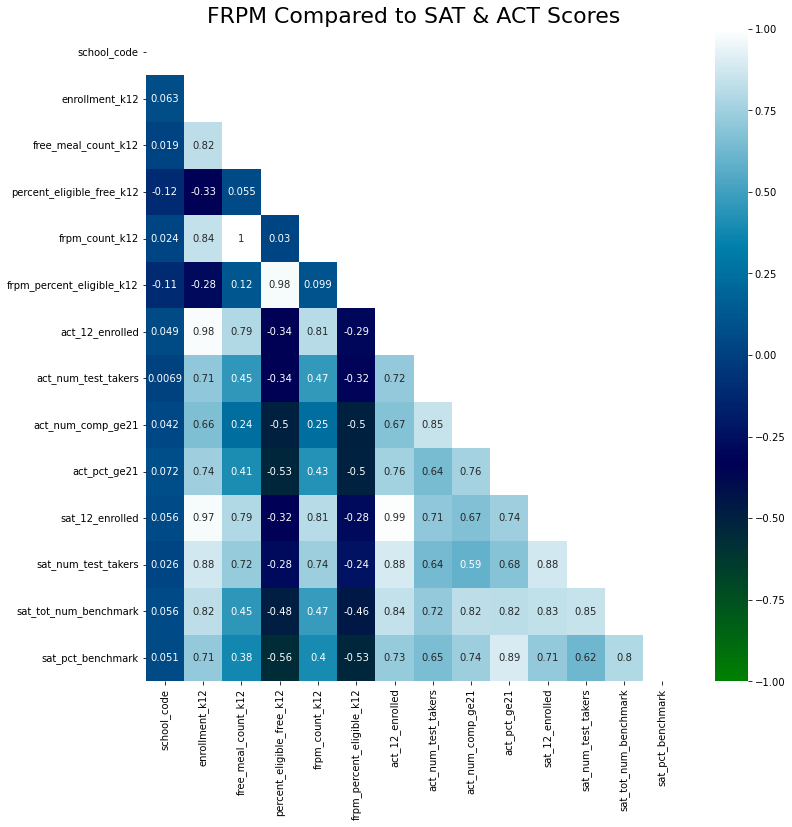

In [66]:
# 1. Correlation Heatmap 
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(frpm_act_sat.corr(), dtype=bool))
sns.heatmap(frpm_act_sat.corr(), vmin=-1, vmax=1, cmap='ocean', mask=mask, annot=True)
plt.title('FRPM Compared to SAT & ACT Scores', fontsize=22);

*The above heatmap shows a negative correlation between the Percent of students eligible for FRPM. The negative correlation means that typically, the higher the number of students eligible for FRPM, the lower the ACT/SAT tests scores will be.*

Percentage of students who met the benchmark of ERW and Math in Grade 12 and percentage of test takers whose ACT Composite Cores are greater than or equal to 21.

Percent of students eligible for free meals:
SAT -0.56 | ACT -0.53

Percent of students eligible for FRPM:
SAT -0.53 | ACT -0.50

Enrollment of K-12 students at the school:
SAT 0.71 | ACT 0.74

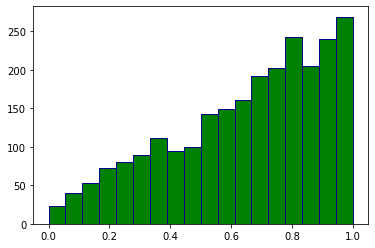

In [84]:
# 2. Histograms
plt.hist(frpm_act_sat['frpm_percent_eligible_k12'], color='green', bins=18, ec="darkblue");


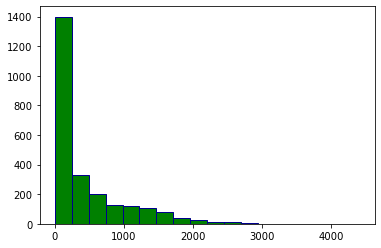

In [74]:
plt.hist(frpm_act_sat['frpm_count_k12'], color='green', bins=18, ec="darkblue");

The above two histograms show similar data and have simlar inverted type histograms.

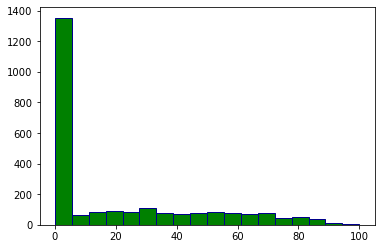

In [68]:
plt.hist(frpm_act_sat['sat_pct_benchmark'], color='green', bins=18, ec="darkblue");

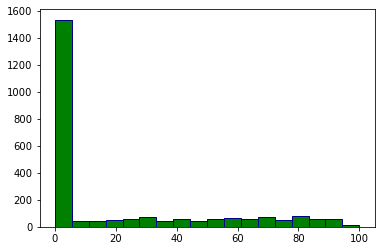

In [69]:
plt.hist(frpm_act_sat['act_pct_ge21'], color='green', bins=18, ec="darkblue");

C:\Users\hatch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


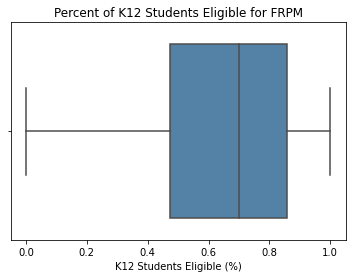

In [70]:
# 3. Boxplots
sns.boxplot(frpm_act_sat.frpm_percent_eligible_k12, 
color='steelblue'
).set(title='Percent of K12 Students Eligible for FRPM', xlabel='K12 Students Eligible (%)');

C:\Users\hatch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


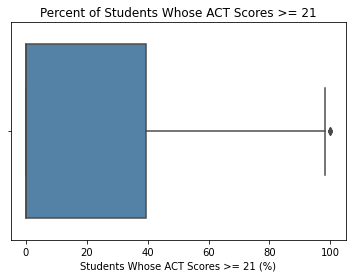

In [76]:
sns.boxplot(frpm_act_sat.act_pct_ge21,
color='steelblue'
).set(title='Percent of Students Whose ACT Scores >= 21', xlabel='Students Whose ACT Scores >= 21 (%)');

In [83]:
# Review of the schools that received 100% of student population with ACT scores 21 or higher. 

frpm_act_sat[(frpm_act_sat['act_pct_ge21']==100)]

,school_code,charter_y_n,school_name,district_name,school_type,enrollment_k12,free_meal_count_k12,percent_eligible_free_k12,frpm_count_k12,frpm_percent_eligible_k12,act_12_enrolled,act_num_test_takers,act_num_comp_ge21,act_pct_ge21,sat_12_enrolled,sat_num_test_takers,sat_tot_num_benchmark,sat_pct_benchmark
1561,3030616,No,Oxford Academy,Anaheim Union High,High Schools (Public),1250,371,0.297,446,0.357,200.0,56.0,56.0,100.0,200.0,113.0,106.0,93.81
1852,3731072,Yes,River Valley Charter,Lakeside Union Elementary,High Schools (Public),325,50,0.154,50,0.154,50.0,15.0,15.0,100.0,50.0,20.0,17.0,85.00
2209,5630322,No,Santa Susana High,Simi Valley Unified,High Schools (Public),1046,209,0.200,253,0.242,252.0,26.0,26.0,100.0,252.0,67.0,54.0,80.60


Noticed the outlier in the above boxplot. 

After review, it is likely these three schools have many test study resources available to help students practice the test. Additionally, they had small numbers of test takers.

C:\Users\hatch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


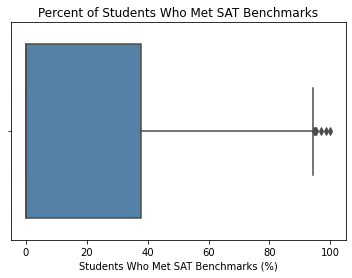

In [71]:
sns.boxplot(frpm_act_sat.sat_pct_benchmark,
color='steelblue'
).set(title='Percent of Students Who Met SAT Benchmarks', xlabel='Students Who Met SAT Benchmarks (%)');

Assuming that the same as above could relate to the outliers in this boxplot where schools may have many test study resources available to help students practice the test with smaller numbers of test takers.

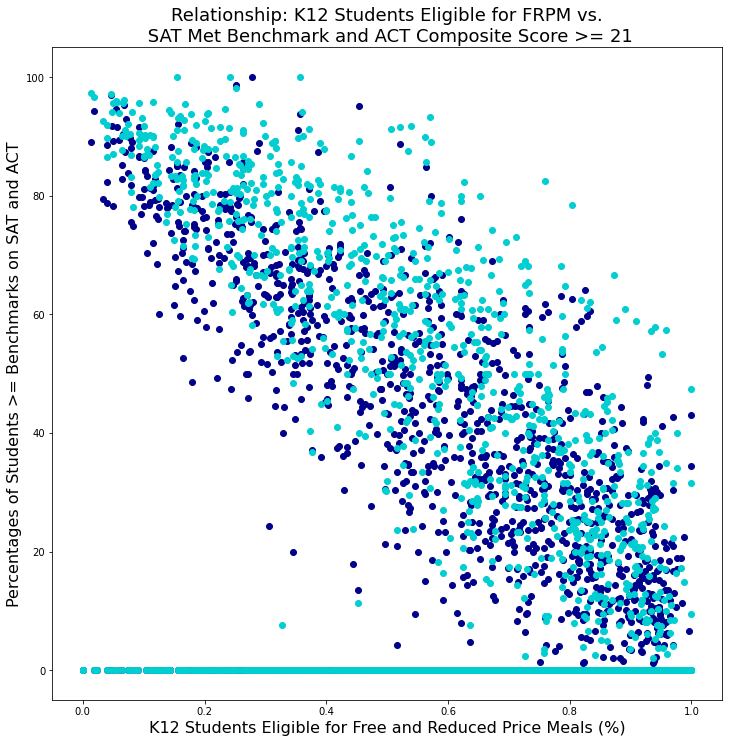

In [164]:
# 4. Scatter Plot to visualize relationships
plt.figure(figsize=(12,12))
plt.scatter(x='frpm_percent_eligible_k12', y='sat_pct_benchmark', data=frpm_act_sat, color='darkblue')
plt.scatter(x='frpm_percent_eligible_k12', y='act_pct_ge21', data=frpm_act_sat, color='darkturquoise')
plt.title('Relationship: K12 Students Eligible for FRPM vs.\n SAT Met Benchmark and ACT Composite Score >= 21', fontsize=18)
plt.xlabel('K12 Students Eligible for Free and Reduced Price Meals (%)', fontsize=16)
plt.ylabel('Percentages of Students >= Benchmarks on SAT and ACT', fontsize=16);

The above scatterplot confirms that there is a negative correlation between the Percent of students eligible for FRPM. As the data shows, the higher the number of students eligible for FRPM, the lower the ACT/SAT tests scores will be.

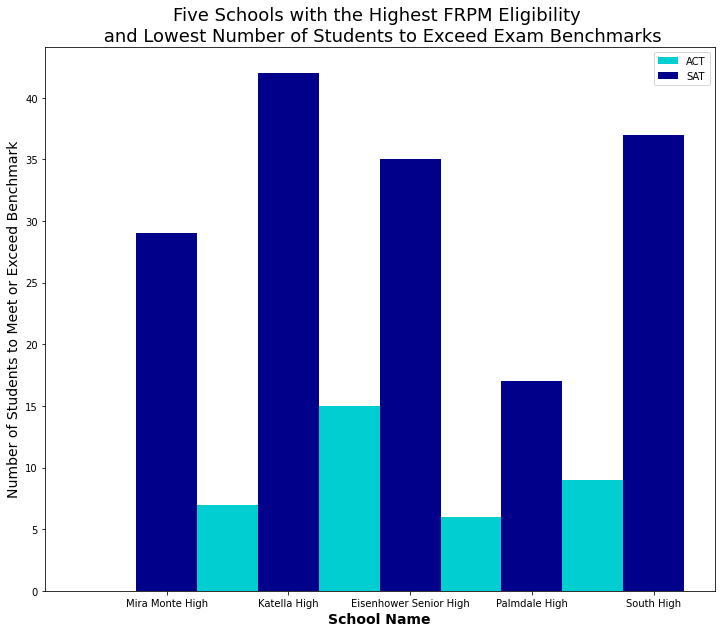

In [163]:
# 5 Additional Visualization to show the five schools with the highest FRPM eligibility and lowest number of students to meet or exceed exam benchmarks
plt.figure(figsize=(12,10))
y = 'school_name'
barwidth = 0.50
widtha = sort_act_sat['act_num_comp_ge21']
widthb = sort_act_sat['sat_tot_num_benchmark']

r1 = np.arange(len(widtha))
r2 = [i + barwidth for i in r1]

plt.bar(r1, widtha, color='darkturquoise', width=barwidth, label="ACT")
plt.bar(r2, widthb, color="darkblue", width=barwidth, label="SAT")
plt.title("Five Schools with the Highest FRPM Eligibility \n and Lowest Number of Students to Exceed Exam Benchmarks", fontsize="18")
plt.ylabel("Number of Students to Meet or Exceed Benchmark", fontsize="14")
plt.xlabel("School Name", fontsize="14")

plt.xlabel('School Name', fontweight='bold')
plt.xticks([r + barwidth for r in range(len(widtha))], sort_act_sat['school_name'])

plt.legend();

*Findings are interesting that these five lower scoring schools had more students do well on the SAT versus the number who did well on the ACT.*

## Conclusions and Recommendations

In conclusion, there is a correlation between students who are eligible for Free and Reduced-Price Meals and those students who score low on the ACT or SAT. Additionally, many eligible students do not even take the ACT or SAT. 

I recommend that the ACT and SAT exam provide give free access to the tests for all students in FRPM eligible schools and for all students who are eligible for FRPM in any school. Make the free assessments as accessible as possible for students eligible for FRPM so that it is easy to take the assessments.

Additionally, I recommend that the State of California, the Federal Government, and other funding providers continue to provide financial assistance to the schools and districts with the most participants in the Free or Reduced-Priced Meal (FRPM) program. This would include funding to provide study resources and practice test opportunities. 

## Sources:
* Income Eligibility Guidelines can be found from the Food and Nutrition Service Agency of the United States of America: https://www.federalregister.gov/documents/2018/05/08/2018-09679/child-nutrition-programs-income-eligibility-guidelines
* Free or Reduced-Price Meal School-level Data and [Data Dictionary](https://www.cde.ca.gov/ds/ad/filesspfrpm.asp) can be found on the California Department of Education website: https://www.cde.ca.gov/ds/ad/filessp.asp 
* U.S. Department of Education Title I, Part A website: https://www2.ed.gov/programs/titleiparta/index.html 
* National Center for Education Statistics: https://nces.ed.gov/blogs/nces/post/understanding-school-lunch-eligibility-in-the-common-core-of-data 
* No Kid Hungry: Center for Best Practices: https://bestpractices.nokidhungry.org/ 